In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# function to calculate L(A) ie sum of squares of all elements
def square(b, a):
    a_trans = np.transpose(a)
    a_trans_a = np.matmul(a_trans, a)
    c = b - a_trans_a
    c_new = np.power(c, 2)
    sum_row = np.sum(c_new, axis=1)
    return np.sum(sum_row)

# function to calculate gradient descent ie G(A)
def gradient(a, b, alpha):
    a_trans = np.transpose(a)
    a_trans_a = np.matmul(a_trans, a)
    a_trans_a_minus_b = a_trans_a - b
    g = 4 * np.matmul(a, a_trans_a_minus_b)
    return a - (alpha * g)

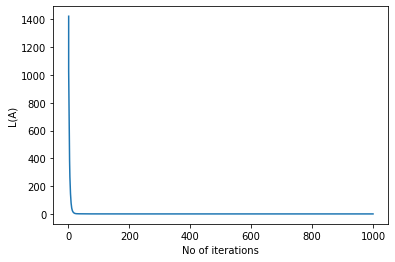

In [3]:
# As per question taken k = 10 and d = 10
k = 10
d = 10

# create a random array of k x D size
arr = np.random.normal(0, 1, k*d)

# create array a
mat_a_old = np.array(arr)
mat_a_old = mat_a_old.reshape(k,d)
mat_a_old_transpose = np.transpose(mat_a_old)

# create array b
mat_b = np.matmul(mat_a_old_transpose, mat_a_old)

# create array a_new
arr = np.random.rand(k,d)
mat_a = np.array(arr)
mat_a = mat_a.reshape(k, d)


x_axis = [1]
y_axis = [square(mat_b, mat_a)]

# calculating the value of L(A) for over a 1000 iterations and checking its convergence
for i in range(1000):
    mat_a = gradient(mat_a, mat_b, 0.005)
    y_axis.append(square(mat_b, mat_a))
    x_axis.append(i + 1)

plt.plot(x_axis, y_axis)

plt.xlabel('No of iterations')
plt.ylabel('L(A)')
plt.show()

[1746.2161598081475, 964.4583031651969, 526.3099619266525, 246.54500157167183, 127.75910891498415, 65.78740965314897, 21.906486211461736, 3.224971508095931, 0.7909092455505607, 1.7376752280965997e-15, 0.0005122364312380123, 0.0010742484290652133, 0.0012253050859569895, 0.001778499282883176, 0.0019953154876394324, 0.002300481305226769, 0.0025152353320504234, 0.002628245689178828, 0.002566701254586832]


Text(0, 0.5, 'Error')

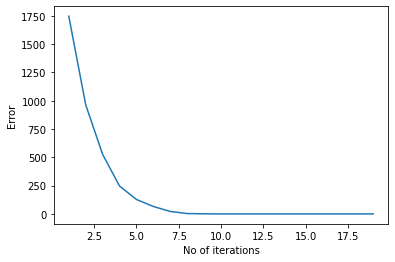

In [4]:
# same process as above --
k, d = 10, 15

arr = np.random.normal(0, 1, k*d)

mat_a_prime = np.array(arr)
mat_a_prime = mat_a_prime.reshape(k,d)

mat_a_prime_transpose = np.transpose(mat_a_prime)
mat_b = np.matmul(mat_a_prime_transpose, mat_a_prime)

# creating an empty list to store error values wrt to k value
final_error = []
k_new = [i for i in range(1,20)]

for k in range(1, 20):
    arr = np.random.rand(k,d)
    a_new = np.array(arr)
    a_new = a_new.reshape(k, d)
    for i in range(1000):
        a_new = gradient(a_new, mat_b, 0.005)
        
    final_error.append(square(mat_b, a_new))


# plot of error vs k
print(final_error)
plt.plot(k_new, final_error)
plt.xlabel('No of iterations')
plt.ylabel('Error')

[4.0, 3.0, 2.0, 1.0, 1.97096626624494e-29, 2.73422327483879e-29, 2.6362134424013487e-29, 1.467782472420969e-29, 1.4256166434712782e-29, 1.2969705028661616e-29, 2.6364673953179226e-29, 2.2509404677725626e-29, 1.4496179288699337e-29, 1.0099768342709227e-29, 7.421951991924731e-30, 1.796602082738176e-29, 2.129573790267562e-29, 1.586374430228121e-29, 3.0679646104929364e-29]


Text(0, 0.5, 'Error')

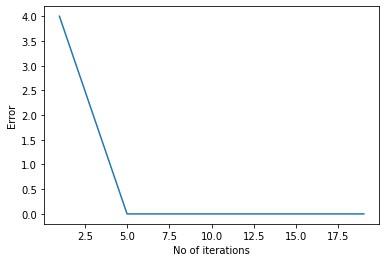

In [5]:
# creating an identity matrix of size 5 (for B)
d = 5
mat_b = np.identity(d)

final_error = []
k_new = [i for i in range(1,20)]

for k in range(1, 20):
    arr = np.random.rand(k,d)
    a_new = np.array(arr)
    a_new = a_new.reshape(k, d)
    for i in range(1000):
        a_new = gradient(a_new, mat_b, 0.005)
        
    final_error.append(square(mat_b, a_new))
    
# plot of error vs k
print(final_error)
plt.plot(k_new, final_error)
plt.xlabel('No of iterations')
plt.ylabel('Error')

[4.000000000000001, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Error')

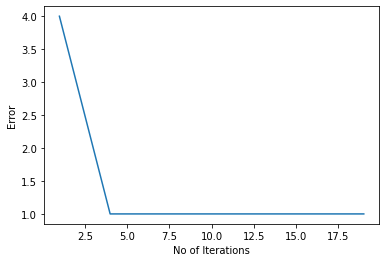

In [6]:
# creating an identity matrix of size 5 (for B) but last element is -1
d = 5
mat_b = np.identity(d)
mat_b[4][4] = -1

final_error = []
k_new = [i for i in range(1,20)]
for k in range(1, 20):
    arr = np.random.rand(k,d)
    a_new = np.array(arr)
    a_new = a_new.reshape(k, d)
    for i in range(1000):
        a_new = gradient(a_new, mat_b, 0.005)
        
    final_error.append(square(mat_b, a_new))
    
# print(len(k_new))
print(final_error)
plt.plot(k_new, final_error)
plt.xlabel('No of Iterations')
plt.ylabel('Error')